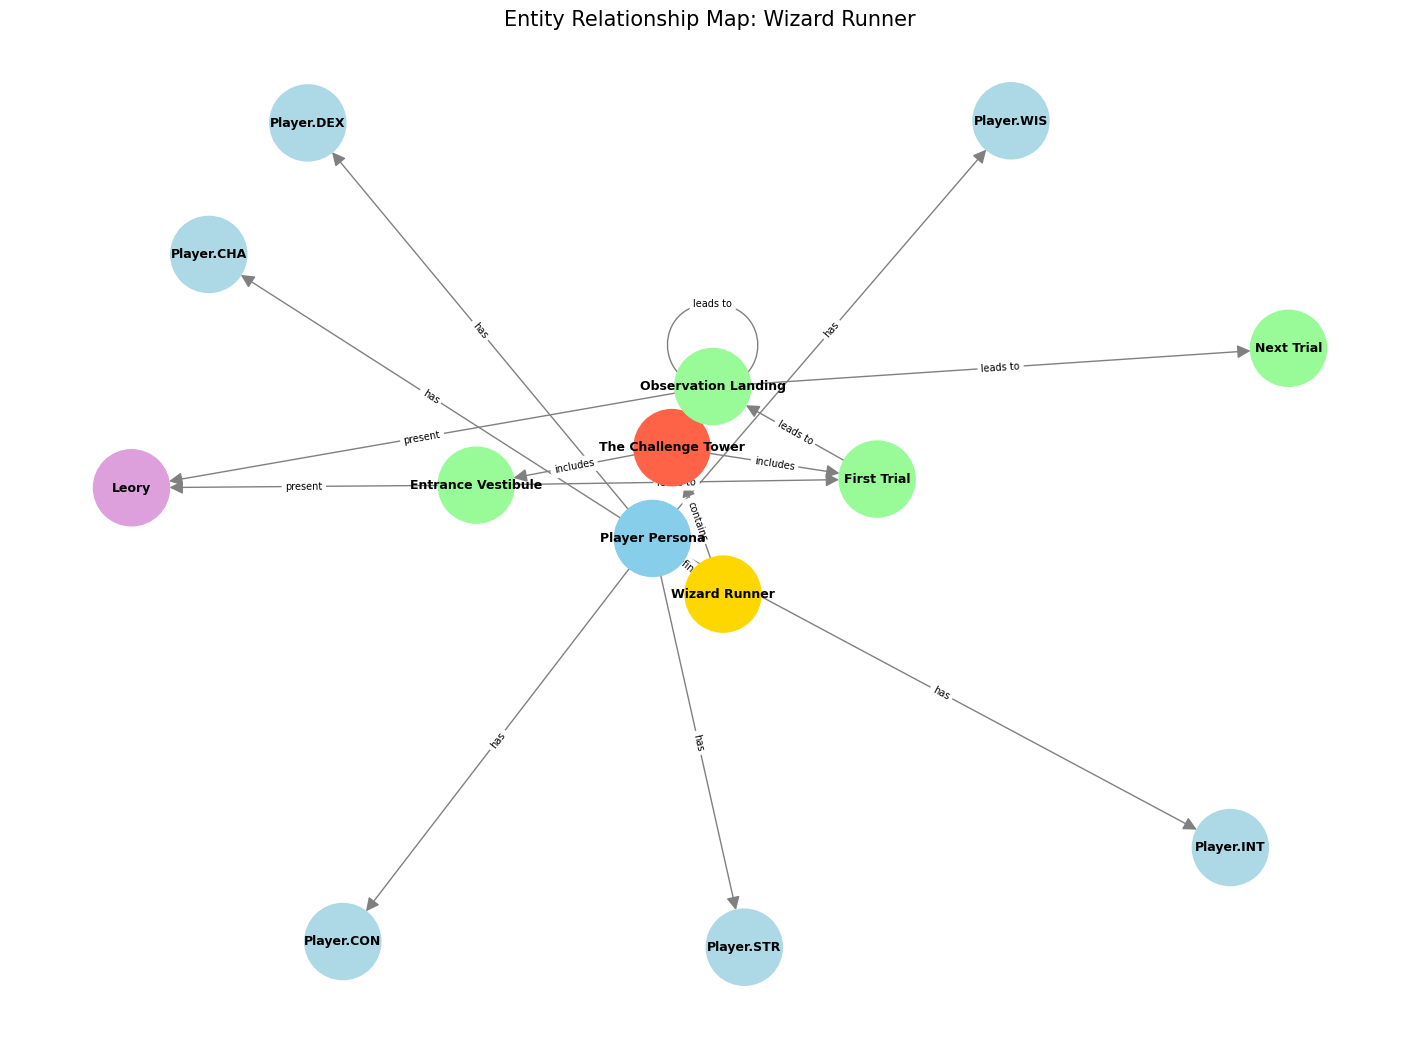

In [4]:
import matplotlib.pyplot as plt
import networkx as nx
import tomllib  # Use 'toml' if on Python < 3.11
from pathlib import Path

# Load the TOML data from file
toml_path = Path("src/research/story-ingestion/wizardrungame.toml")
toml_data = toml_path.read_text()

def plot_wizard_runner_network(data_str):
    data = tomllib.loads(data_str)
    G = nx.DiGraph()

    # 1. Root Node
    root = data.get("title", "Game")
    G.add_node(root, type='root')

    # 2. Player Persona
    player = "Player Persona"
    G.add_node(player, type='player')
    G.add_edge(root, player, label="defines")
    
    for attr in data['player_persona']['attributes']:
        attr_node = f"Player.{attr['name']}"
        G.add_node(attr_node, type='attribute')
        G.add_edge(player, attr_node, label="has")

    # 3. Acts, Scenes, and Characters
    for act in data.get('acts', []):
        act_title = act['title']
        G.add_node(act_title, type='act')
        G.add_edge(root, act_title, label="contains")

        # Scenes
        for scene in act.get('scenes', []):
            scene_title = scene['title']
            G.add_node(scene_title, type='scene')
            G.add_edge(act_title, scene_title, label="includes")

            # Characters in Scenes
            for char in scene.get('characters_present', []):
                G.add_node(char, type='character')
                G.add_edge(scene_title, char, label="present")

            # Transitions/Options
            for opt in scene.get('options', []):
                if 'transition' in opt:
                    G.add_edge(scene_title, opt['transition'], label="leads to")

    # Define visual styles
    color_map = {
        'root': '#FFD700',      # Gold
        'player': '#87CEEB',    # Sky Blue
        'attribute': '#ADD8E6', # Light Blue
        'act': '#FF6347',       # Tomato
        'scene': '#98FB98',     # Pale Green
        'character': '#DDA0DD'  # Plum
    }
    
    node_colors = [color_map.get(G.nodes[node].get('type', 'scene'), '#C0C0C0') for node in G.nodes()]

    # Draw the plot
    plt.figure(figsize=(14, 10))
    pos = nx.spring_layout(G, k=0.5, iterations=50)
    
    nx.draw(G, pos, with_labels=True, node_color=node_colors, 
            node_size=3000, font_size=9, font_weight='bold', 
            edge_color='gray', arrows=True, arrowsize=20)
    
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)

    plt.title(f"Entity Relationship Map: {root}", size=15)
    plt.show()

# Run the function
plot_wizard_runner_network(toml_data)